In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise Pandas

For these exercices we are using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/kernels) provided by Airbnb for a Kaggle competition. It describes its offer for New York City in 2019, including types of appartments, price, location etc.

## 1. Create a dataframe 
Create a dataframe of a few lines with objects and their poperties (e.g fruits, their weight and colour).
Calculate the mean of your Dataframe.

In [2]:
import pandas as pd

data = {
    'fruit': ['apple', 'banana', 'cherry', 'date'],
    'weight': [120, 110, 10, 15],
    'color': ['red', 'yellow', 'red', 'brown']
}
df = pd.DataFrame(data)
print(df[['weight']].mean())


weight    63.75
dtype: float64


## 2. Import
- Import the table called ```AB_NYC_2019.csv``` as a dataframe. It is located in the Datasets folder. Have a look at the beginning of the table (head).

- Create a histogram of prices

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

<Axes: ylabel='Frequency'>

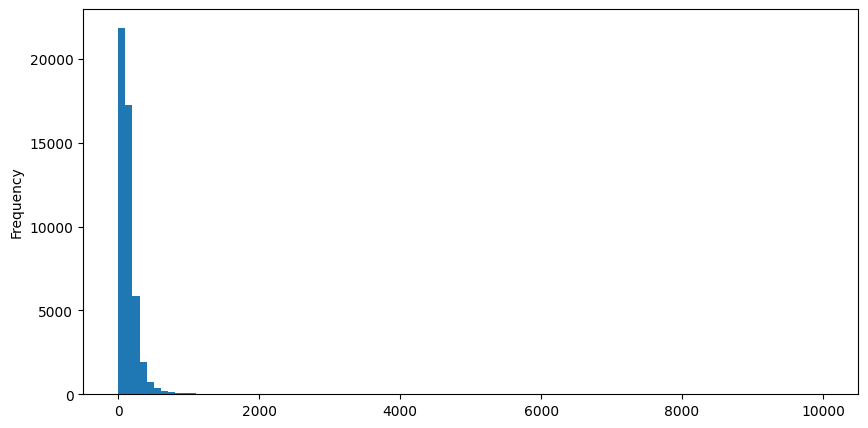

In [ ]:
ab = pd.read_csv(r"/home/kasra/Downloads/9c3fac90-f8d0-4b95-aad5-37477aa662df250725-1941562/AB_NYC_2019.csv")
print(ab.head())

ab['price'].plot.hist(bins=100, figsize=(10, 5))


## 3. Operations

Create a new column in the dataframe by multiplying the "price" and "availability_365" columns to get an estimate of the maximum yearly income.

In [11]:
ab["yearly_income"] = ab["price"] * ab["availability_365"]

## 3b. Subselection and plotting
Create a new Dataframe by first subselecting yearly incomes between 1 and 100'000. Then make a scatter plot of yearly income versus number of reviews 

<Axes: xlabel='number_of_reviews', ylabel='yearly_income'>

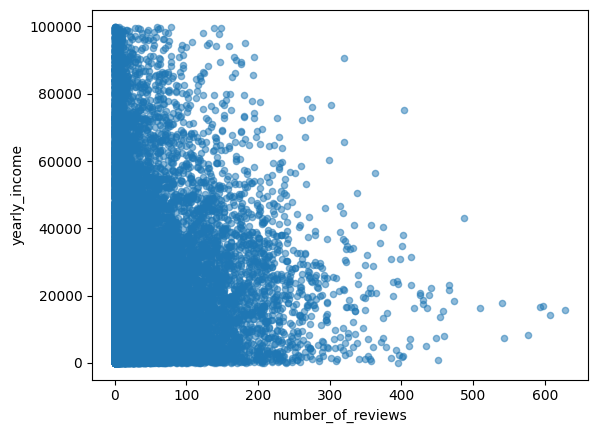

In [12]:
subset = ab[(ab["yearly_income"] >= 1) & (ab["yearly_income"] <= 100000)]
subset.plot.scatter(x="number_of_reviews", y="yearly_income", alpha=0.5)

## 4. Combine

We provide below and additional table that contains the number of inhabitants of each of New York's boroughs ("neighbourhood_group" in the table). Use ```merge``` to add this population information to each element in the original dataframe.

In [14]:
pop_data = {
    'neighbourhood_group': ['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
    'population': [2600000, 1600000, 2300000, 1400000, 470000]
}
pop_df = pd.DataFrame(pop_data)
ab = pd.merge(ab, pop_df, on='neighbourhood_group', how='left')


## 5. Groups

- Using ```groupby``` calculate the average price for each type of room (room_type) in each neighbourhood_group. What is the average price for an entire home in Brooklyn ?
- Unstack the multi-level Dataframe into a regular Dataframe with ```unstack()``` and create a bar plot with the resulting table


## 6. Advanced plotting

Using Seaborn, create a scatter plot where x and y positions are longitude and lattitude, the color reflects price and the shape of the marker the borough (neighbourhood_group). Can you recognize parts of new york ? Does the map make sense ?

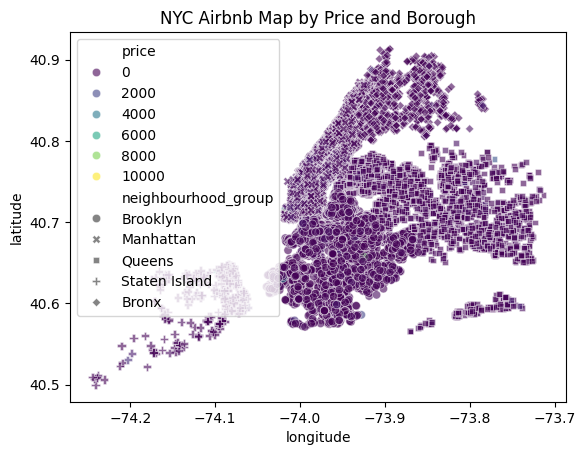

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=ab, 
    x='longitude', 
    y='latitude', 
    hue='price', 
    style='neighbourhood_group', 
    palette='viridis',
    alpha=0.6
)
plt.title("NYC Airbnb Map by Price and Borough")
plt.show()

#WITH THE HELP OF CHAT GPT